# Seattle Airbnb Open Data Analysis


# Content <font color= black>

# Business Understanding <font color= black>

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


%matplotlib inline

# Data Understanding <font color= black>

In [2]:
calendar_df = pd.read_csv('calendar.csv',thousands=',')

In [3]:
calendar_df[:5]

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
calendar_df.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [5]:
# Missing values in the dataframes

In [6]:
calendar_df.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [7]:
"""
The price column in the calendar dataframe has NaN values  which represents rooms availablity as not available. 
hence rows having NaN columns have been dropped in the column as those rows are not needed for the further analysis .
"""

'\nThe price column in the calendar dataframe has NaN values  which represents rooms availablity as not available. \nhence rows having NaN columns have been dropped in the column as those rows are not needed for the further analysis .\n'

In [8]:
# Dropping the rows with NaN values
calendar_df = calendar_df.dropna(axis=0)

In [9]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
listing_id    934542 non-null int64
date          934542 non-null object
available     934542 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 35.6+ MB


In [10]:
calendar_df.describe()

,listing_id
count,9.345420e+05
mean,5.305517e+06
std,2.974821e+06
min,3.335000e+03
25%,2.875975e+06
50%,5.615620e+06
75%,7.873345e+06
max,1.034016e+07


In [11]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


## Data Preparation <font color= black>

In [12]:
calendar_df.available[calendar_df.available == 't'] = 1
calendar_df.available[calendar_df.available == 'f'] = 0

/Users/pranavhonrao/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
calendar_df["price"]= calendar_df["price"].str.replace('$','')
calendar_df["price"] = calendar_df["price"].str.replace(",","").astype(float)

Text(0.5,1,'Histogram of listing prices')

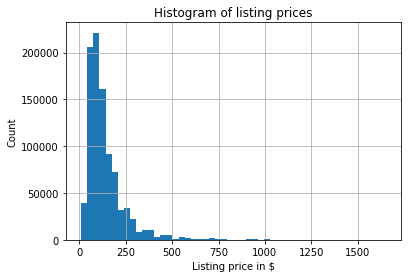

In [14]:
calendar_df['price'].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices')

In [15]:
calendar_df['date'] = pd.to_datetime(calendar_df['date'])
calendar_plot_df = pd.DataFrame(calendar_df.groupby(calendar_df['date'].dt.strftime('%B'))['available'].sum().sort_values())
calendar_plot_df.reset_index(level=0, inplace=True)
calendar_plot_df['available'].sum()
    

934542

In [17]:
calendar_plot_df


,date,available
0,January,64937
1,February,73321
2,July,74222
3,April,76037
4,August,76347
5,June,77244
6,September,77246
7,May,79971
8,November,81780
9,October,82438


In [18]:
def graph_plot(df):
    """
    graph_plot function will plot the bar graph of date and avaiable column .
    """
    
    return df.plot(x="date", y="available", kind="bar")
    

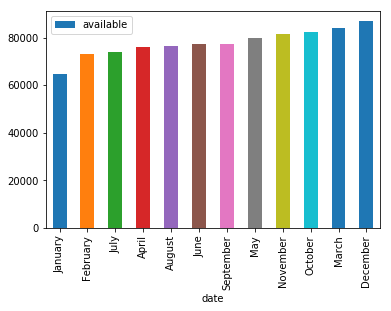

In [19]:
graph_plot(calendar_plot_df)

** Question 1 : Room avaiablity  through out the year in Seattle.**

**Ans:** 
From the above graph, I can see January ,Feburary has less rooms available which make sense to me. As people would not prefer to put home on airbnb becuase of winter season. Also, in summer days Seattle being one of the famous cities to visit ,less rooms are avaiable. 

Interesingly , room availability do not vary that much beside March and December. I think ,in march people start putting there home on Airbnb listings but do not get that much of response causing high number of rooms avaiable. This is maybe because ,people travel less during that period. Surprisingly for December, room availability is high. 




In [20]:
montlyprice_mean_df = calendar_df.groupby(calendar_df['date'].dt.strftime('%B'))['price'].mean().sort_values()

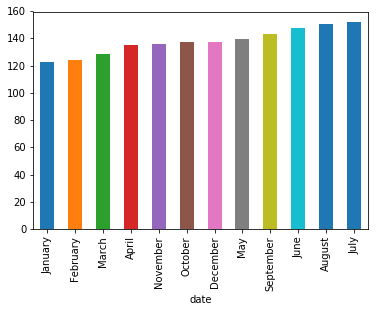

In [21]:
graph_plot(montlyprice_mean_df)

** Question 2 : Mean prices analysis per month**


**Ans:**
From above figure , we can get precise idea about mean prices analysis per month . In the winter season , prices are low as expected. Average Prices are pretty high in summer. Being a metropolitan city and torist attraction, people /tourist prefer to  visit Seattle in summer vacation which leads to increase in  average price consumption up $40 in summer days.

##  Data Analysis  <font color= black>

**For the price analysis , I have used listing.csv file which contains many features to build a model.**

In [22]:
listing_df = pd.read_csv('listings.csv',thousands=',')

In [23]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [24]:
# To predict the price , I have select the reveleant columns and created new dataframe as below.

In [25]:
df = listing_df[["host_response_rate", "host_acceptance_rate", "host_is_superhost",
               "host_listings_count", "property_type","room_type", "accommodates", "bathrooms", "bedrooms", 
               "beds","guests_included", "price", "review_scores_rating","review_scores_cleanliness","review_scores_location","review_scores_communication","review_scores_value","cancellation_policy", 
               "reviews_per_month","instant_bookable"]]

In [26]:
# With the available data frame , I have checked columns with NaN values.

In [27]:
df.isnull().sum()

host_response_rate             523
host_acceptance_rate           773
host_is_superhost                2
host_listings_count              2
property_type                    1
room_type                        0
accommodates                     0
bathrooms                       16
bedrooms                         6
beds                             1
guests_included                  0
price                            0
review_scores_rating           647
review_scores_cleanliness      653
review_scores_location         655
review_scores_communication    651
review_scores_value            656
cancellation_policy              0
reviews_per_month              627
instant_bookable                 0
dtype: int64

In [28]:
# As we can see, 'host_acceptance_rate' column has highest number of null values, I have dropped it out of the dataframe.

In [29]:
df =df.drop(columns='host_acceptance_rate')

In [30]:
# removing the Nan/missing values 

In [31]:
seattle_listing_df =df.dropna(axis=0)

#releasing the memory by removing the unwanted dataframe

df=None

In [32]:
seattle_listing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2835 entries, 0 to 3814
Data columns (total 19 columns):
host_response_rate             2835 non-null object
host_is_superhost              2835 non-null object
host_listings_count            2835 non-null float64
property_type                  2835 non-null object
room_type                      2835 non-null object
accommodates                   2835 non-null int64
bathrooms                      2835 non-null float64
bedrooms                       2835 non-null float64
beds                           2835 non-null float64
guests_included                2835 non-null int64
price                          2835 non-null object
review_scores_rating           2835 non-null float64
review_scores_cleanliness      2835 non-null float64
review_scores_location         2835 non-null float64
review_scores_communication    2835 non-null float64
review_scores_value            2835 non-null float64
cancellation_policy            2835 non-null object
re

In [33]:
seattle_listing_df.isnull().sum()

host_response_rate             0
host_is_superhost              0
host_listings_count            0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
guests_included                0
price                          0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_location         0
review_scores_communication    0
review_scores_value            0
cancellation_policy            0
reviews_per_month              0
instant_bookable               0
dtype: int64

In [34]:
seattle_listing_df['host_response_rate'] = seattle_listing_df['host_response_rate'].astype(str)
seattle_listing_df['price'] = seattle_listing_df['price'].astype(str)
seattle_listing_df['host_response_rate'] = seattle_listing_df['host_response_rate'].str.replace("%", "").astype("float")
seattle_listing_df['price'] = seattle_listing_df['price'].str.replace("[$, ]", "").astype("float")

In [35]:
seattle_listing_df.instant_bookable.unique()

array(['f', 't'], dtype=object)

In [36]:
seattle_listing_df.host_is_superhost[seattle_listing_df.host_is_superhost == 't'] = 1
seattle_listing_df.host_is_superhost[seattle_listing_df.host_is_superhost == 'f'] = 0
seattle_listing_df['host_is_superhost']=seattle_listing_df['host_is_superhost'].astype(int)
seattle_listing_df.instant_bookable[seattle_listing_df.instant_bookable == 't'] = 1
seattle_listing_df.instant_bookable[seattle_listing_df.instant_bookable == 'f'] = 0
seattle_listing_df['instant_bookable']=seattle_listing_df['instant_bookable'].astype(int)

/Users/pranavhonrao/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/pranavhonrao/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/pranavhonrao/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd f

In [37]:
object_dtype = seattle_listing_df.select_dtypes(include=['object']).columns
seattle_listing_df[object_dtype].head()

,property_type,room_type,cancellation_policy
0,Apartment,Entire home/apt,moderate
1,Apartment,Entire home/apt,strict
2,House,Entire home/apt,strict
4,House,Entire home/apt,strict
6,House,Private room,moderate


In [38]:
seattle_listing_df.property_type.unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Other', 'Dorm',
       'Bed & Breakfast', 'Yurt', 'Chalet', 'Tent', 'Treehouse'],
      dtype=object)

In [39]:
seattle_listing_df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [40]:
seattle_listing_df.cancellation_policy.unique()

array(['moderate', 'strict', 'flexible'], dtype=object)

In [41]:
#  As object datatype has to be represented in the numerical format , I have used get dummies function 

In [42]:
dummy_var_list = pd.get_dummies(seattle_listing_df[object_dtype])

In [43]:
dummy_var_list.head()

,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [44]:
seattle_listing_df= seattle_listing_df.drop(object_dtype,axis=1)
seattle_listing_df = pd.merge(seattle_listing_df,dummy_var_list, left_index=True, right_index=True)
seattle_listing_df.head()

,host_response_rate,host_is_superhost,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,price,review_scores_rating,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,96.0,0,3.0,4,1.0,1.0,1.0,2,85.0,95.0,...,0,0,0,0,1,0,0,0,1,0
1,98.0,1,6.0,4,1.0,1.0,1.0,1,150.0,96.0,...,0,0,0,0,1,0,0,0,0,1
2,67.0,0,2.0,11,4.5,5.0,7.0,10,975.0,97.0,...,0,0,0,0,1,0,0,0,0,1
4,100.0,0,2.0,6,2.0,3.0,3.0,6,450.0,92.0,...,0,0,0,0,1,0,0,0,0,1
6,100.0,1,1.0,2,1.0,1.0,1.0,1,80.0,99.0,...,0,0,0,0,0,1,0,0,1,0


In [45]:
seattle_listing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2835 entries, 0 to 3814
Data columns (total 38 columns):
host_response_rate               2835 non-null float64
host_is_superhost                2835 non-null int64
host_listings_count              2835 non-null float64
accommodates                     2835 non-null int64
bathrooms                        2835 non-null float64
bedrooms                         2835 non-null float64
beds                             2835 non-null float64
guests_included                  2835 non-null int64
price                            2835 non-null float64
review_scores_rating             2835 non-null float64
review_scores_cleanliness        2835 non-null float64
review_scores_location           2835 non-null float64
review_scores_communication      2835 non-null float64
review_scores_value              2835 non-null float64
reviews_per_month                2835 non-null float64
instant_bookable                 2835 non-null int64
property_type_Apartme

## Feature Visualization  <font color= black>

Text(0.5,0,'Listing price in $')

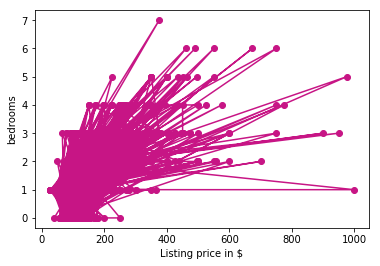

In [46]:
from matplotlib.pyplot import *
plt.plot( 'price', 'bedrooms', data=seattle_listing_df, marker='o', color='mediumvioletred')
plt.ylabel('bedrooms')
plt.xlabel('Listing price in $')

Text(0.5,0,'Listing price in $')

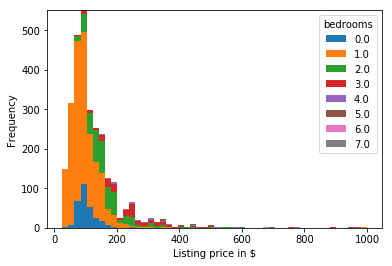

In [47]:
seattle_listing_df.pivot(columns = 'bedrooms',values = 'price').plot.hist(stacked = True,bins=50)
plt.xlabel('Listing price in $')


## Data Modeling <font color= black>

In [48]:
X = seattle_listing_df.drop('price', axis =1)
y = seattle_listing_df['price']

In [49]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=1)
seattle_linear_model = linear_model.LinearRegression()
seattle_linear_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
y_train_pred = seattle_linear_model.predict(X_train)
y_test_pred = seattle_linear_model.predict(X_test)

In [51]:
rms_ols2= math.sqrt(mean_squared_error(y_test,y_test_pred))
print('MSE train: %.4f, test: %.4f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.4f, test: %.4f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 3210.8097, test: 2230.3912
R^2 train: 0.5866, test: 0.6410


In [52]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=300, 
                               criterion='mse', 
                               random_state=4)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.4f, test: %.4f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.4f, test: %.4f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 445.4331, test: 1938.0942
R^2 train: 0.9426, test: 0.6880



## Evaluate the Results <font color= black>

From the above analysis , I have summrized following information about the settle aibnb usgae:


    1: January and February (winter season) has less number of listing avaiable because of the weather.Summer time period being the  second most in less number of availabity.
    
    
    2: For the prices , average mean prices are less in the month of Jan and Feb which is fair as inclement weather can affect people choices to out. On contractory , summer time is most favorable time in the year where people prefer to go outside locations.Hence , we can see in significient  spike in prices in summer duration.
    
    
    3: As for the prediction  of prices , I was able to get the value if R^2 near about to 70%. With the less data being one of the prime roadblock to achieve more accurate results. As we are finding the continous value of the price, regression algorithms were used for the prediction.